In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import fitparse

In [2]:
def parseFitFile(file_path):
    
    fitfile = fitparse.FitFile(file_path)
    
    series = []
    
    for record in fitfile.get_messages("record"):

        row = {
            'altitude': np.NAN,
            'cadence': np.NAN,
            'distance': np.NAN,
            'heart_rate': np.NAN,
            'power': np.NAN,
            'speed': np.NAN,
            'timestamp': np.NAN
        }
        for data in record:
            if data.name in ['altitude','cadence','distance','heart_rate','power','speed','timestamp']:
                row[data.name] = data.value

        if row['timestamp']:
            series += [row]
            
    df = pd.DataFrame(series)
#     df = df.set_index('timestamp')
    
    return df

In [3]:
FILE_FORMAT = "../Downloads/tdz-stage{}.fit"
dfs = {}
for i in range(1,9):
    f = FILE_FORMAT.format(i)
    ride = "TDZ-{}".format(i)
    print(f)
    dfs[ride] = parseFitFile(f)

../Downloads/tdz-stage1.fit
../Downloads/tdz-stage2.fit
../Downloads/tdz-stage3.fit
../Downloads/tdz-stage4.fit
../Downloads/tdz-stage5.fit
../Downloads/tdz-stage6.fit
../Downloads/tdz-stage7.fit
../Downloads/tdz-stage8.fit


FileNotFoundError: [Errno 2] No such file or directory: '../Downloads/tdz-stage8.fit'

In [4]:
# dfs

<AxesSubplot:>

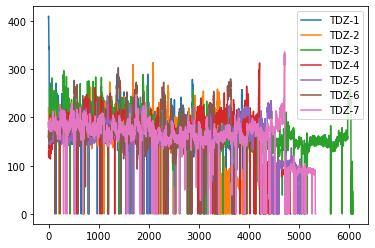

In [22]:
power = {}
for key in dfs:
    power[key] = dfs[key]['power']
    
powerDF = pd.DataFrame(power)
powerDF.plot()

<AxesSubplot:>

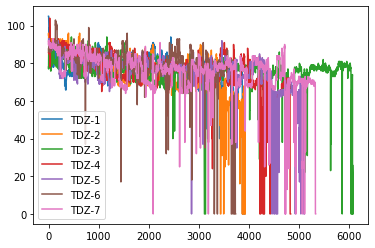

In [6]:
cadence = {}
for key in dfs:
    cadence[key] = dfs[key]['cadence']
    
cadenceDF = pd.DataFrame(cadence)
cadenceDF.plot()

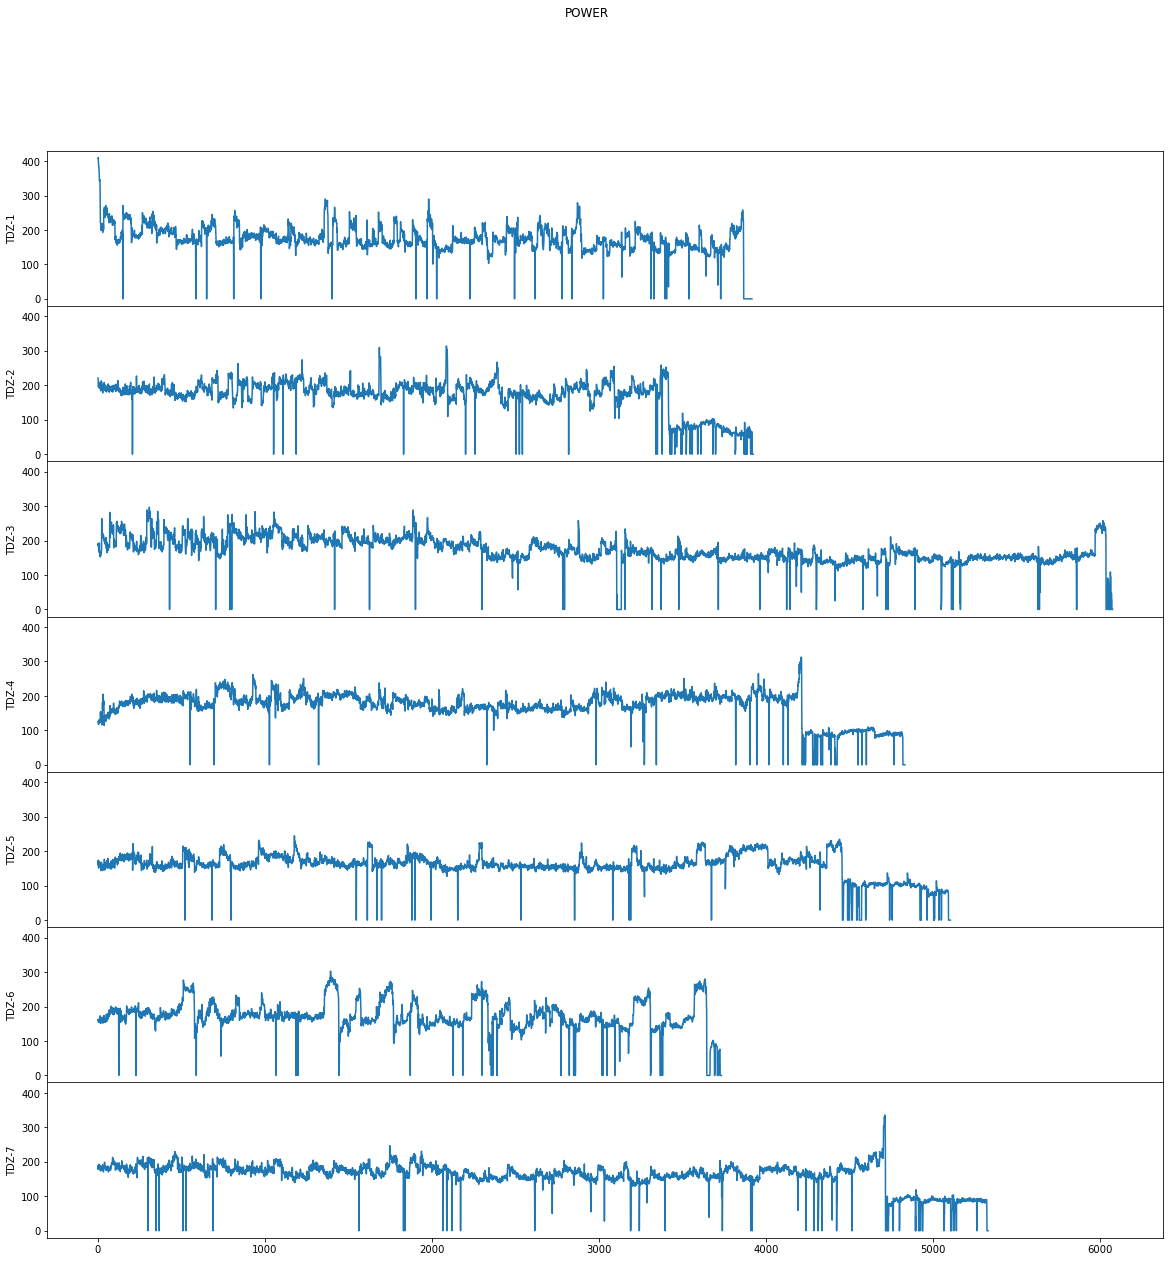

In [20]:
num_plots = len(dfs)

fig, axs = plt.subplots(num_plots, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.set_size_inches(20, 20)
fig.suptitle('POWER')

i = 0
for key in dfs:
    axs[i].plot(dfs[key].power)
    axs[i].set(ylabel=key)
    i+=1

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

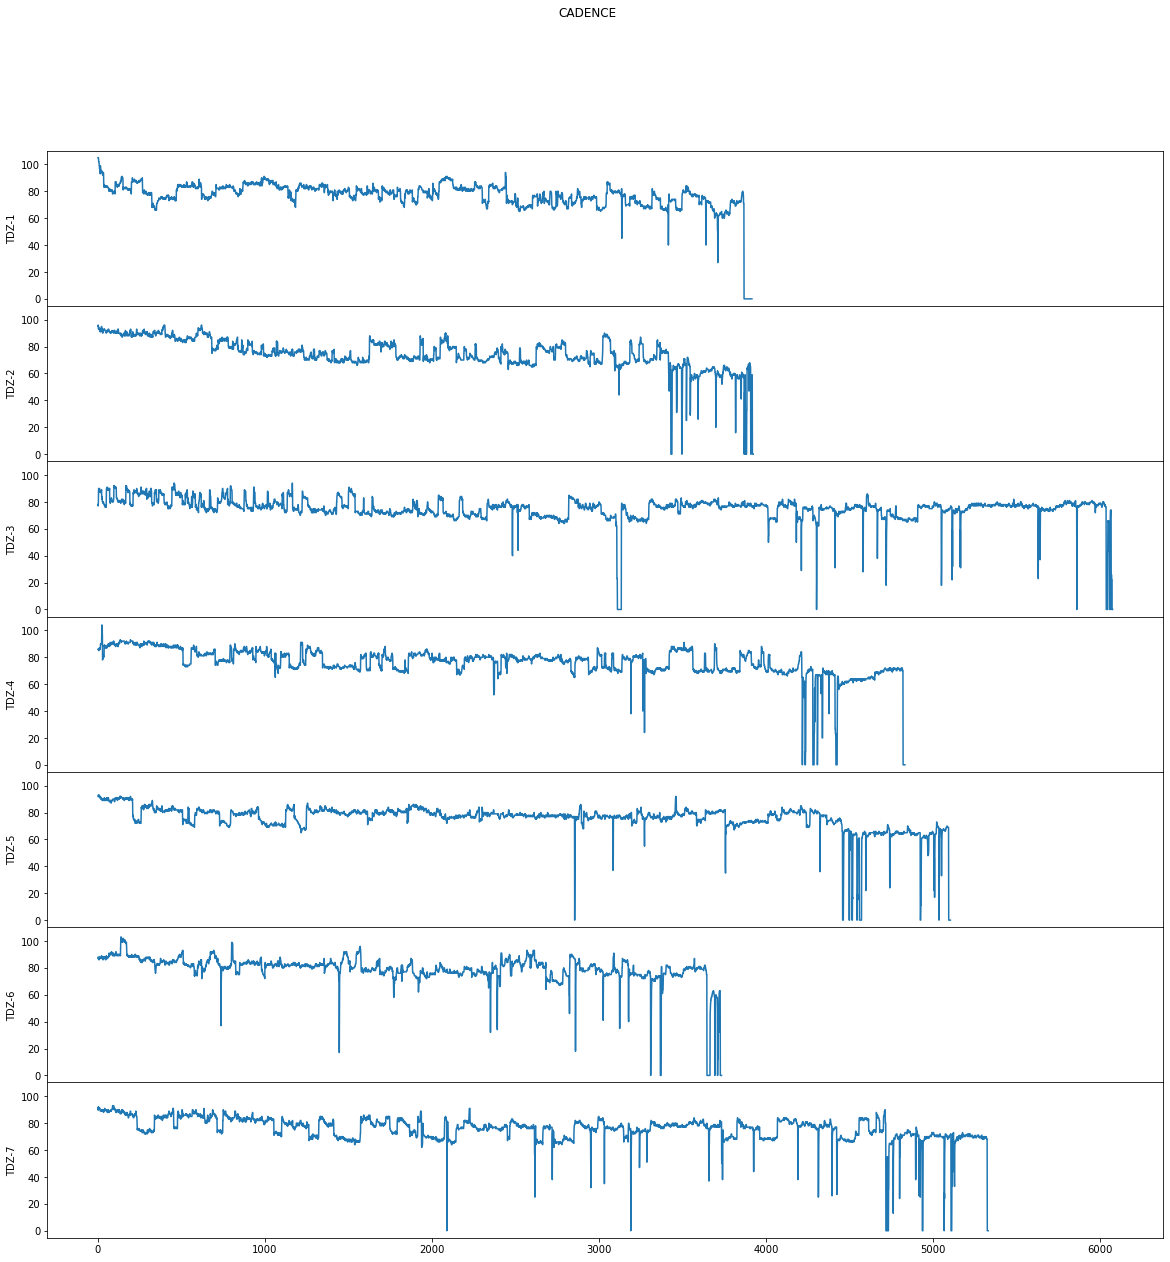

In [23]:
num_plots = len(dfs)

fig, axs = plt.subplots(num_plots, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.set_size_inches(20, 20)
fig.suptitle('CADENCE')

i = 0
for key in dfs:
    axs[i].plot(dfs[key].cadence)
    axs[i].set(ylabel=key)
    i+=1

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()